## EE 551 Data Processing Project
### Yoohan Ko, Cole Yarbrough
"I pledge my honor I have abided by the Stevens Honor System" -YHK, CY

# UN energy data analysis
[data source](http://data.un.org/_Docs/SYB/CSV/SYB62_263_201904_Production,%20Trade%20and%20Supply%20of%20Energy.csv)

This data contains all the bulk energy consumption categories for each of the world's regions and countries. The data begins in 1990 and has data-points every 5 years and more frequent data from recent years. A data cleaning step using regex was needed in order to convert the numbers into a format the python interpreter was able to convert into integers.

The goal of this project is to clean and format this UN Energy dataset and plot [Supply per capita (gigajoules)] data from each identified area. By plotting different regions over time, we can visualize trends in power usage around the world over the past three decades. By plotting all these regions on the same plot, we can compare the energy usage of populations around the world. 

Hypotheses:
- Energy usage continually increases in the entire world over time
- Energy usage growth will be driven by developing countries, while energy usage in developed countries is already high, but growing slowly

In [49]:
# import necessary packages
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

In [50]:
# dataset was first opened in Excel, then saved in UTF-8 format to be able to be imported

# import dataset into pandas dataframe
df = pd.read_csv("energy.csv", 
                 usecols=['Region/Country/Area', 'Production, trade and supply of energy', 'Year', 'Series', 'Value'])
df.rename(columns={'Region/Country/Area':'Area_ID', 'Production, trade and supply of energy':'Area'}, inplace=True)
df

Area_ID                           Area  Year  \
0           1  Total, all countries or areas  1990   
1           1  Total, all countries or areas  1995   
2           1  Total, all countries or areas  2000   
3           1  Total, all countries or areas  2005   
4           1  Total, all countries or areas  2010   
...       ...                            ...   ...   
8288      716                       Zimbabwe  2005   
8289      716                       Zimbabwe  2010   
8290      716                       Zimbabwe  2014   
8291      716                       Zimbabwe  2015   
8292      716                       Zimbabwe  2016   

                                      Series    Value  
0     Primary energy production (petajoules)  360,903  
1     Primary energy production (petajoules)  380,713  
2     Primary energy production (petajoules)  412,155  
3     Primary energy production (petajoules)  476,738  
4     Primary energy production (petajoules)  530,597  
...                                      ...      ...  
8288          Supply per capita (gigajoules)       33  
8289          Supply per capita (gigajoules)       28  
8290          Supply per capita (gigajoules)       30  
8291          Supply per capita (gigajoules)       30  
8292          Supply per capita (gigajoules)       29  

[8293 rows x 5 columns]

If you notice, you can see that some values within the 'Value' column have commas (and potentially other punctionation marks). 

This causes the 'Value' column to be identified as an object rather than a numeric as shown below.

In [3]:
df.dtypes

Area_ID     int64
Area       object
Year        int64
Series     object
Value      object
dtype: object

In order to fix this, we are going to use a regex function to filter out all of the punctuation within the column and remove it completely

In [4]:
# Using regex function to remove all punctuation within the 'Value' column
df['Value'] = df['Value'].replace('[^\d\.]','', regex=True)

In [5]:
# errors='coerce': if entry cannot be converted to numeric, replace with nan
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# if there are any NAN values, drop the column
df.dropna()
df

Area_ID                           Area  Year  \
0           1  Total, all countries or areas  1990   
1           1  Total, all countries or areas  1995   
2           1  Total, all countries or areas  2000   
3           1  Total, all countries or areas  2005   
4           1  Total, all countries or areas  2010   
...       ...                            ...   ...   
8288      716                       Zimbabwe  2005   
8289      716                       Zimbabwe  2010   
8290      716                       Zimbabwe  2014   
8291      716                       Zimbabwe  2015   
8292      716                       Zimbabwe  2016   

                                      Series   Value  
0     Primary energy production (petajoules)  360903  
1     Primary energy production (petajoules)  380713  
2     Primary energy production (petajoules)  412155  
3     Primary energy production (petajoules)  476738  
4     Primary energy production (petajoules)  530597  
...                                      ...     ...  
8288          Supply per capita (gigajoules)      33  
8289          Supply per capita (gigajoules)      28  
8290          Supply per capita (gigajoules)      30  
8291          Supply per capita (gigajoules)      30  
8292          Supply per capita (gigajoules)      29  

[8293 rows x 5 columns]

In [6]:
df.dtypes

Area_ID     int64
Area       object
Year        int64
Series     object
Value       int64
dtype: object

## Plotting World Data

In [7]:
# extract Supply per capita data for the world from 1990 to 2016
df_world = df.loc[(df.Area_ID == 1) & (df.Series == 'Supply per capita (gigajoules)')]
df_world

Area_ID                           Area  Year  \
32        1  Total, all countries or areas  1990   
33        1  Total, all countries or areas  1995   
34        1  Total, all countries or areas  2000   
35        1  Total, all countries or areas  2005   
36        1  Total, all countries or areas  2010   
37        1  Total, all countries or areas  2014   
38        1  Total, all countries or areas  2015   
39        1  Total, all countries or areas  2016   

                            Series  Value  
32  Supply per capita (gigajoules)     62  
33  Supply per capita (gigajoules)     65  
34  Supply per capita (gigajoules)     66  
35  Supply per capita (gigajoules)     71  
36  Supply per capita (gigajoules)     74  
37  Supply per capita (gigajoules)     75  
38  Supply per capita (gigajoules)     75  
39  Supply per capita (gigajoules)     74

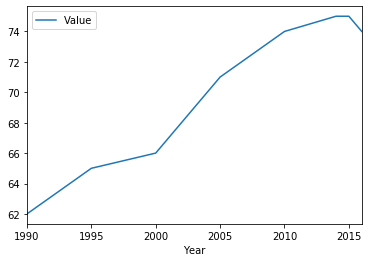

In [8]:
df_world.plot(x='Year', y='Value', kind='line')

## test plotting Africa energy data

In [9]:
# extract Supply per capita data for the world from 1990 to 2016
df_Africa = df.loc[(df.Area == 'Africa') & (df.Series == 'Supply per capita (gigajoules)')]
df_Africa

Area_ID    Area  Year                          Series  Value
72        2  Africa  1990  Supply per capita (gigajoules)     25
73        2  Africa  1995  Supply per capita (gigajoules)     26
74        2  Africa  2000  Supply per capita (gigajoules)     26
75        2  Africa  2005  Supply per capita (gigajoules)     27
76        2  Africa  2010  Supply per capita (gigajoules)     27
77        2  Africa  2014  Supply per capita (gigajoules)     27
78        2  Africa  2015  Supply per capita (gigajoules)     27
79        2  Africa  2016  Supply per capita (gigajoules)     27

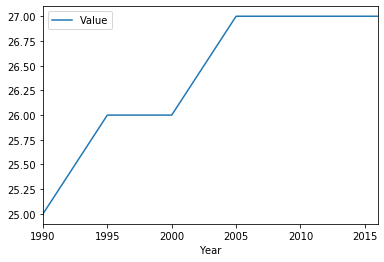

In [10]:
df_Africa.plot(x='Year', y='Value', kind='line')

## Use loop to plot data for all regions

In [11]:
area_list = df['Area'].unique()

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<Figure size 432x288 with 0 Axes>

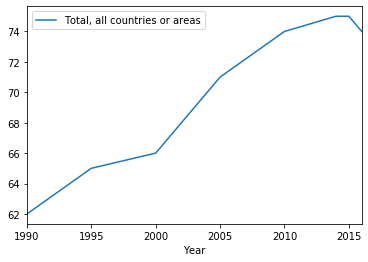

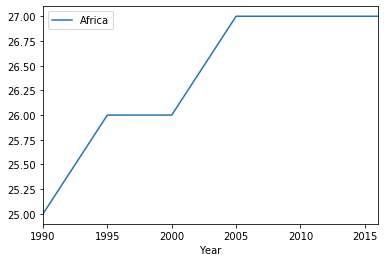

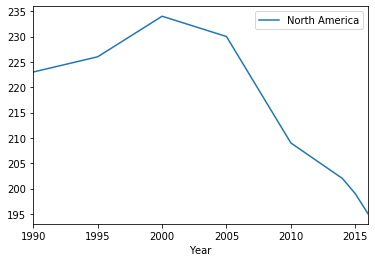

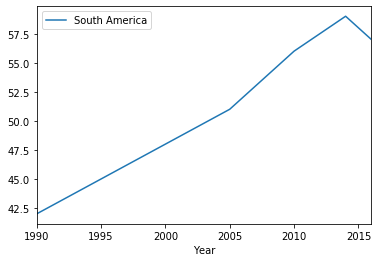

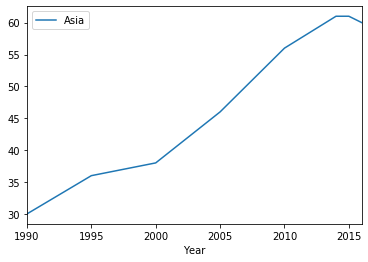

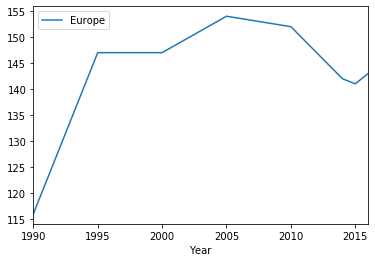

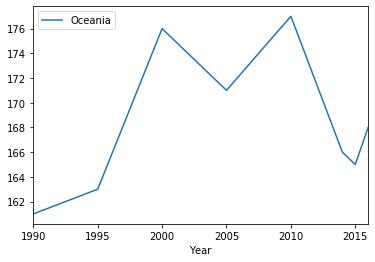

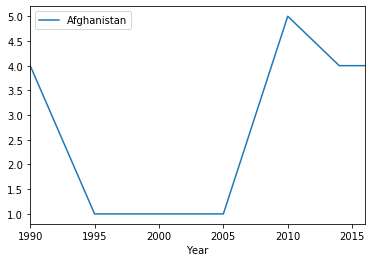

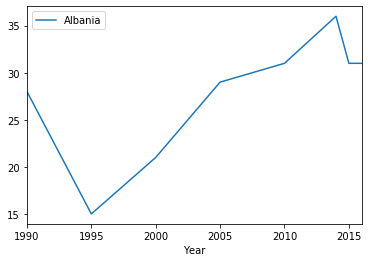

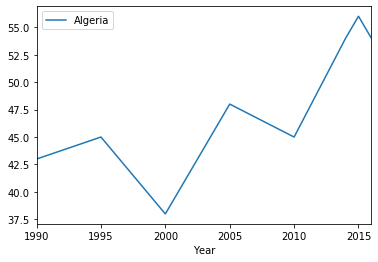

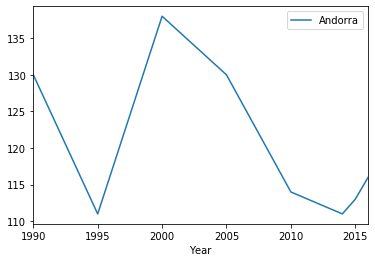

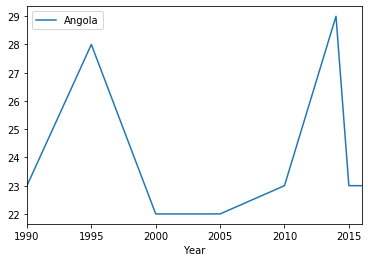

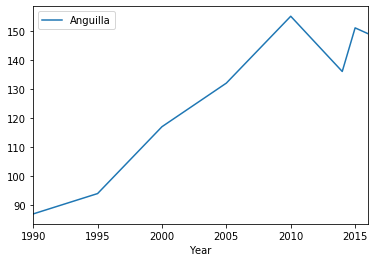

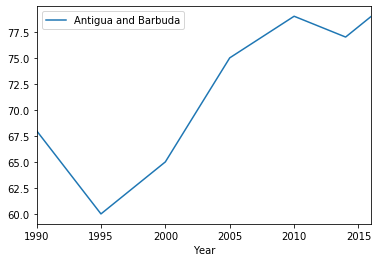

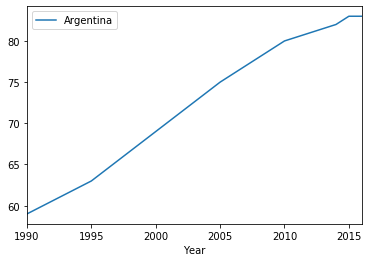

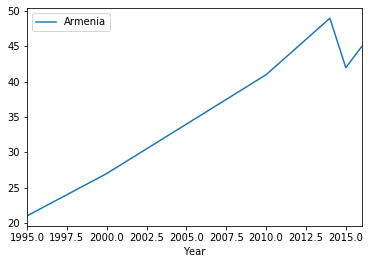

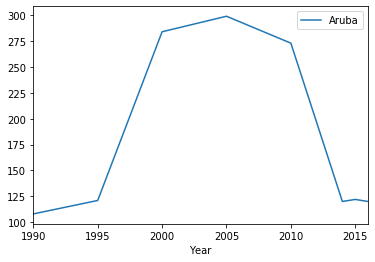

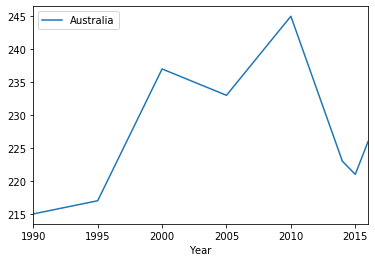

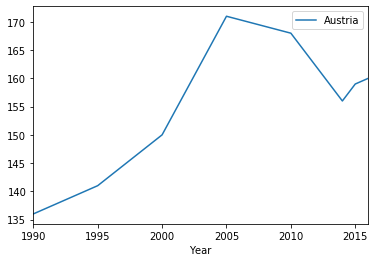

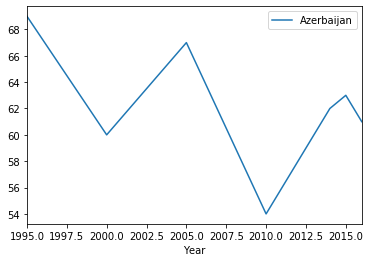

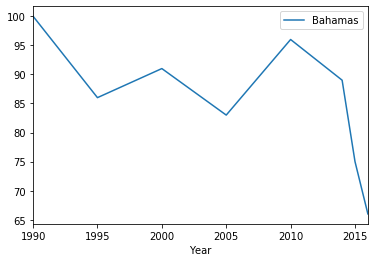

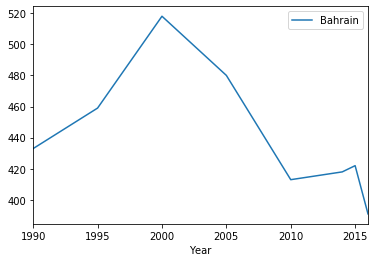

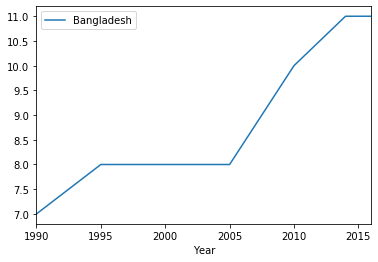

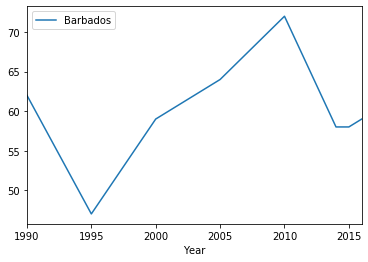

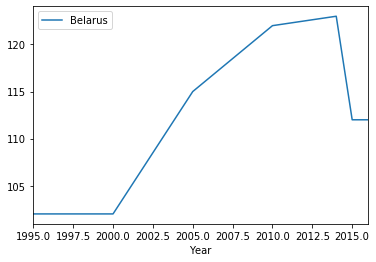

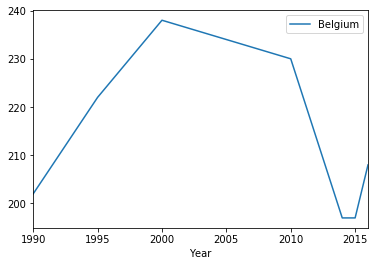

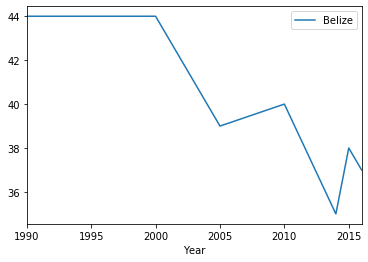

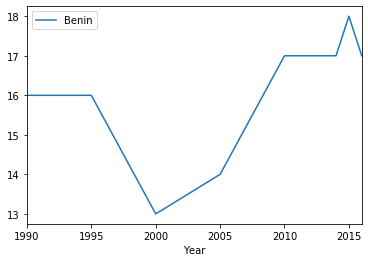

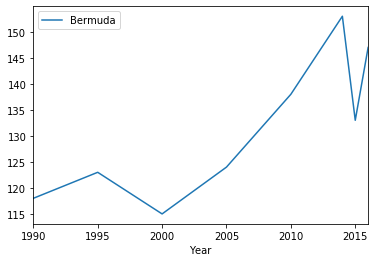

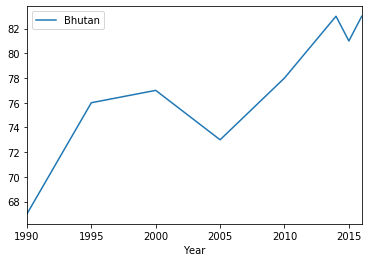

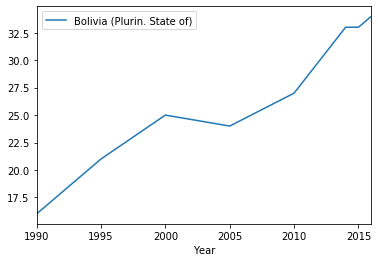

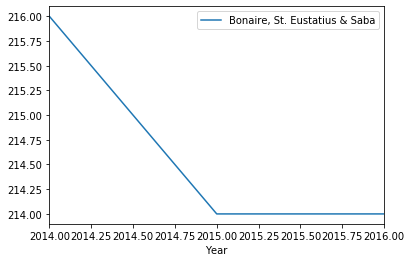

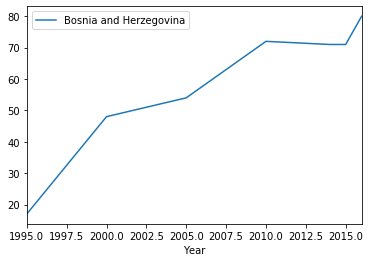

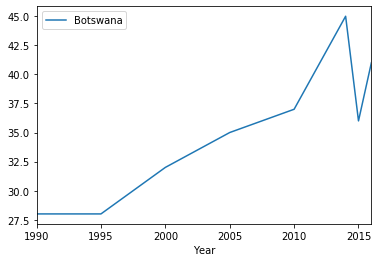

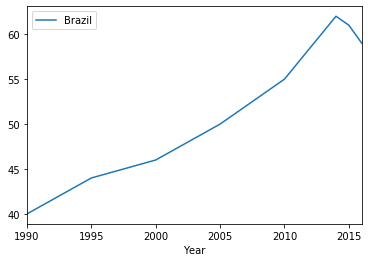

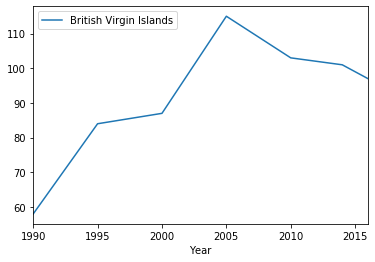

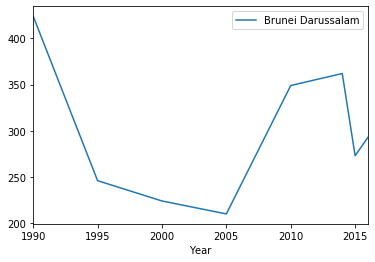

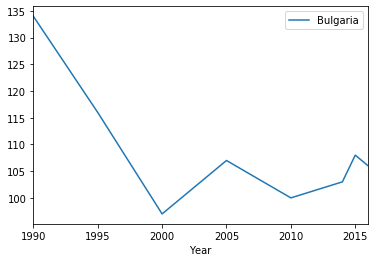

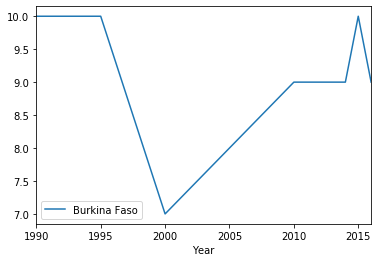

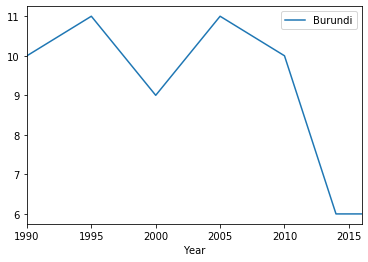

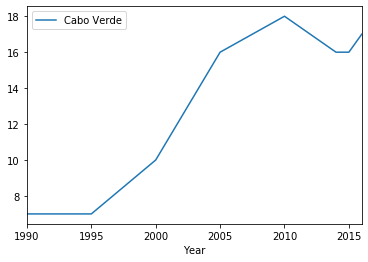

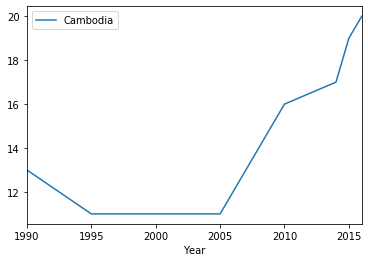

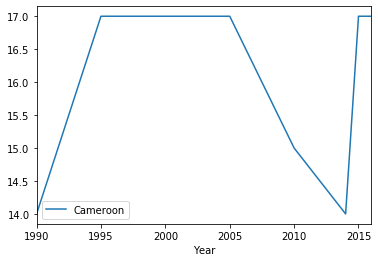

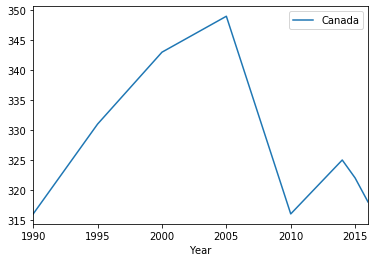

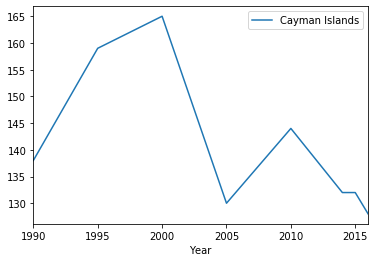

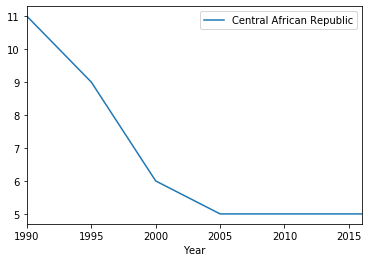

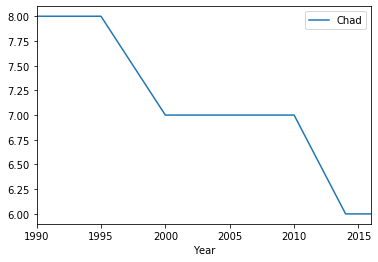

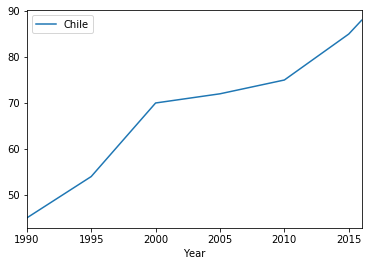

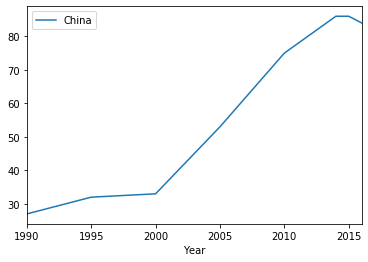

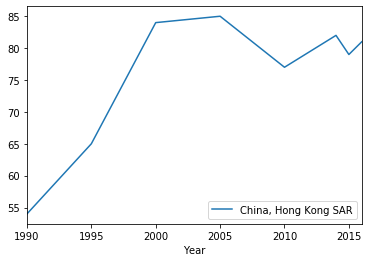

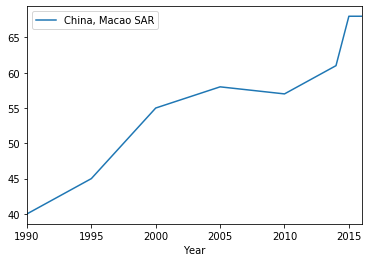

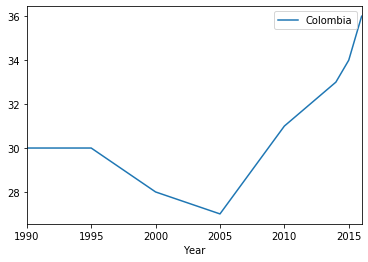

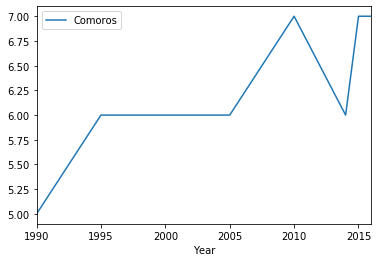

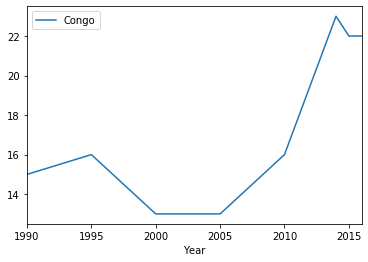

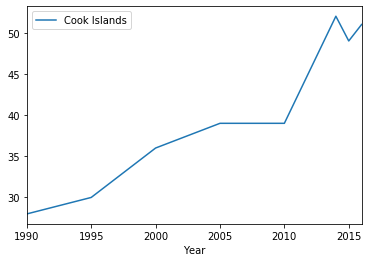

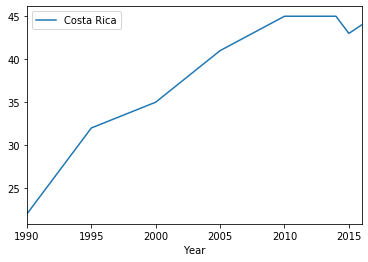

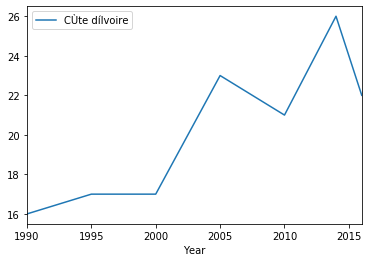

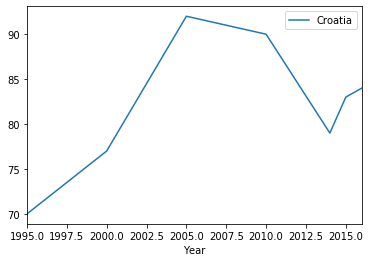

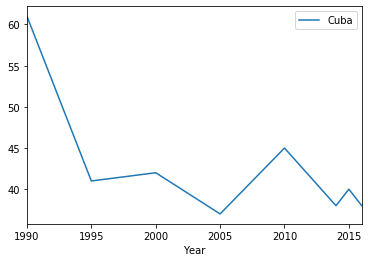

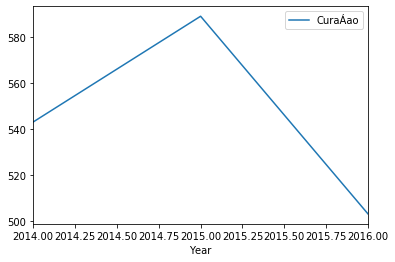

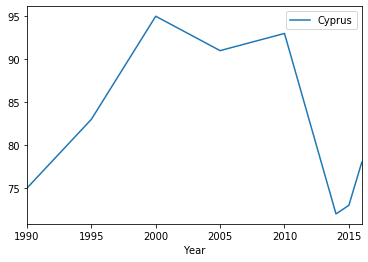

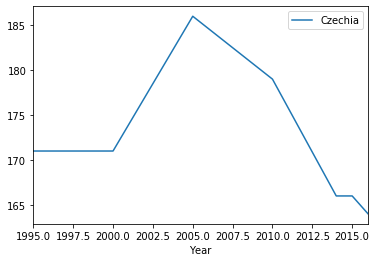

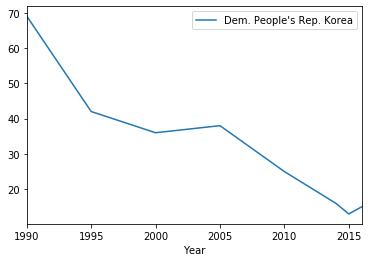

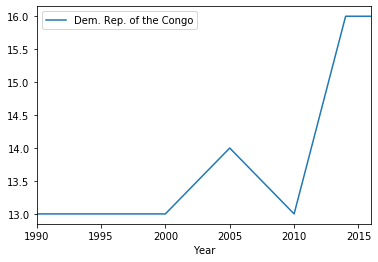

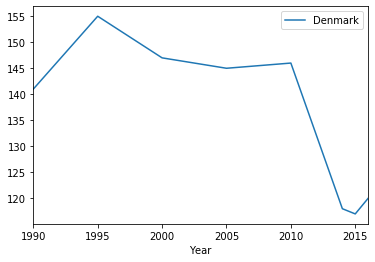

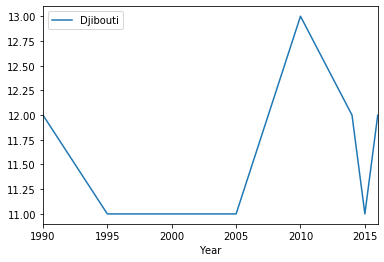

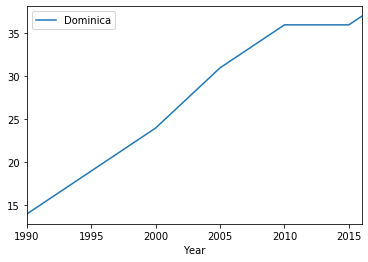

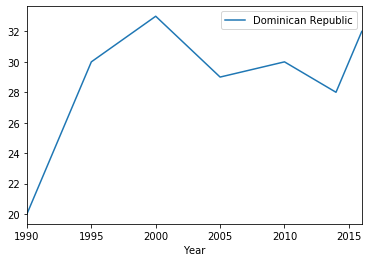

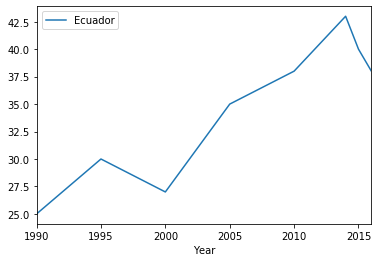

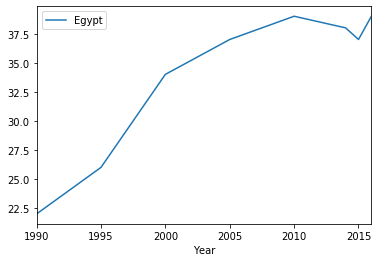

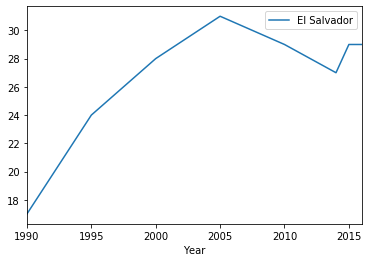

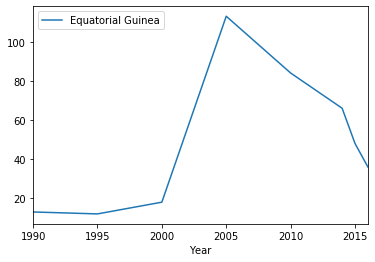

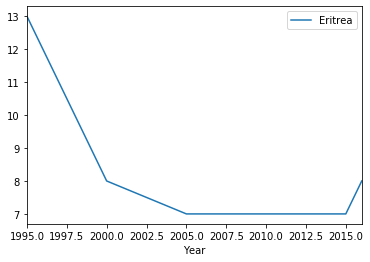

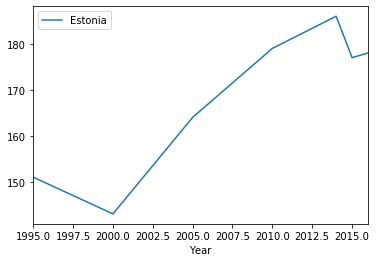

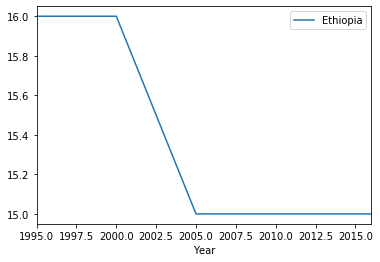

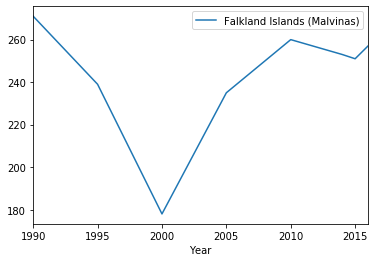

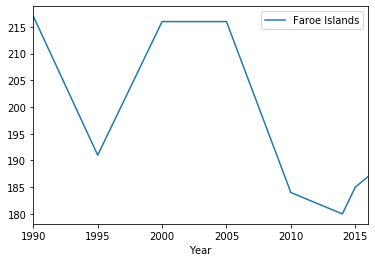

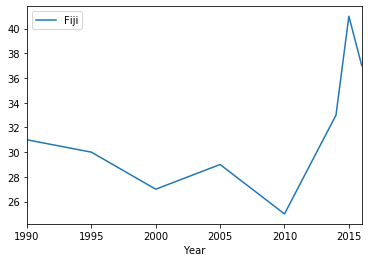

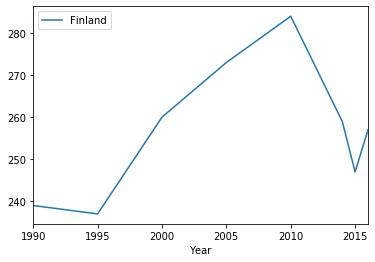

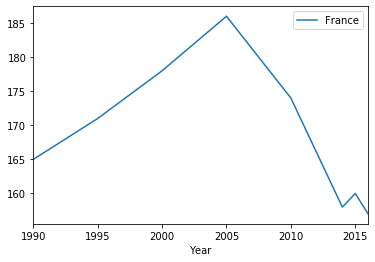

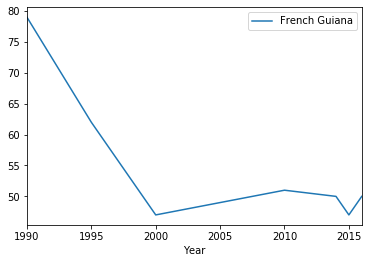

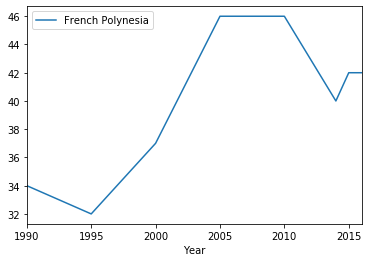

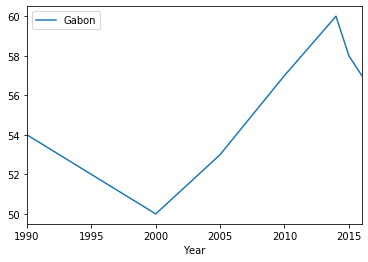

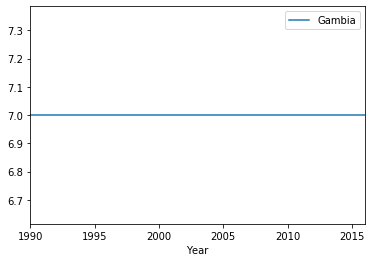

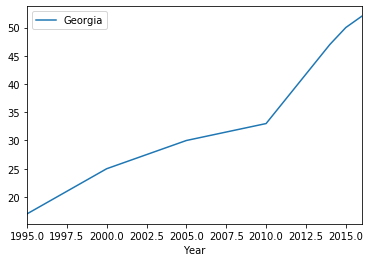

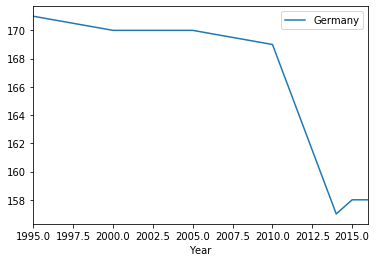

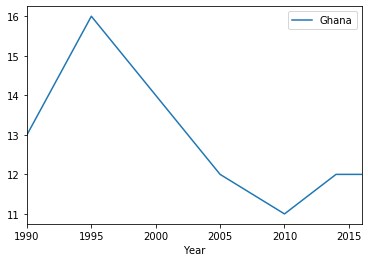

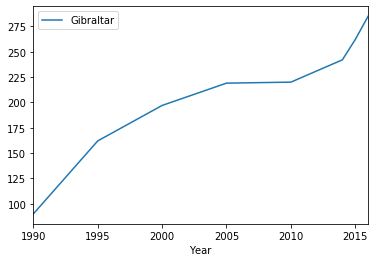

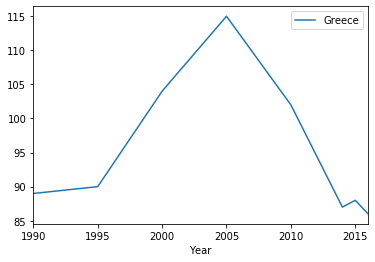

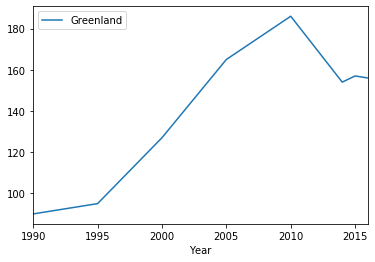

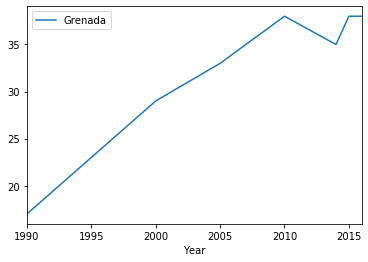

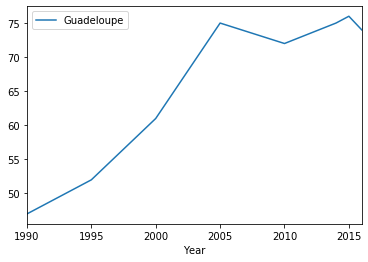

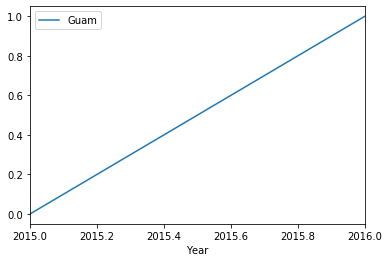

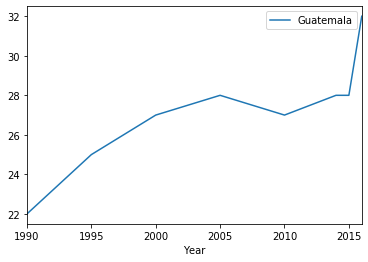

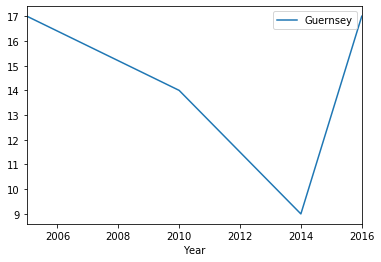

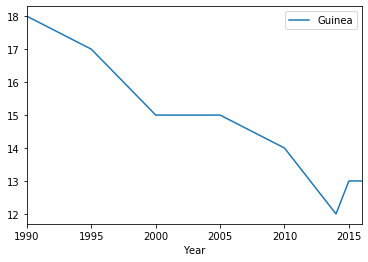

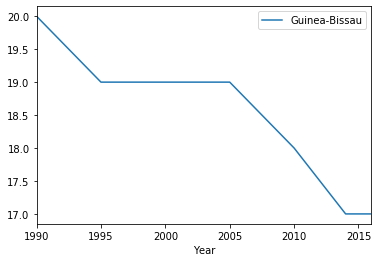

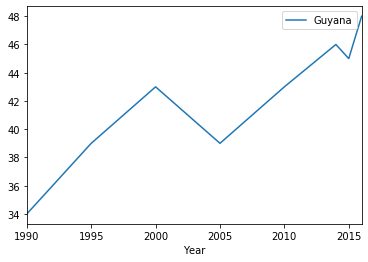

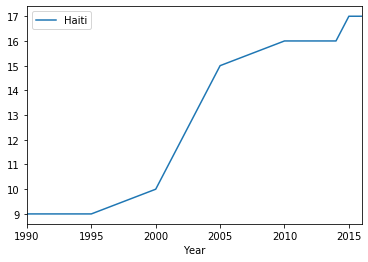

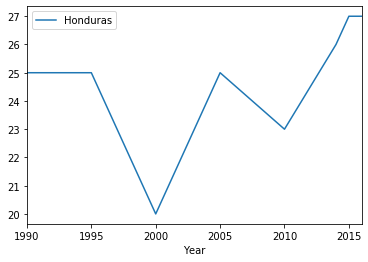

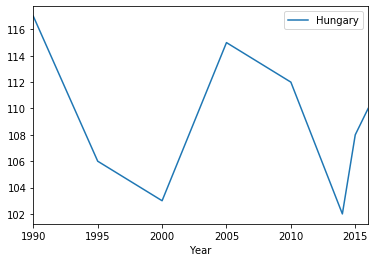

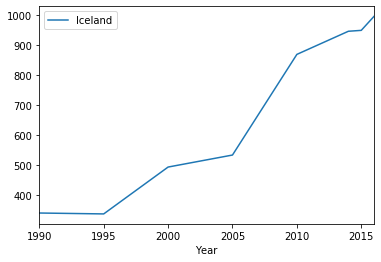

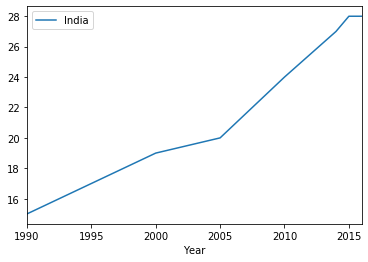

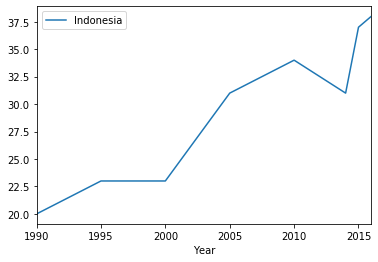

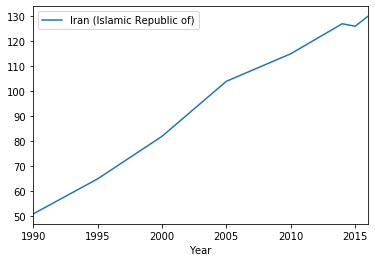

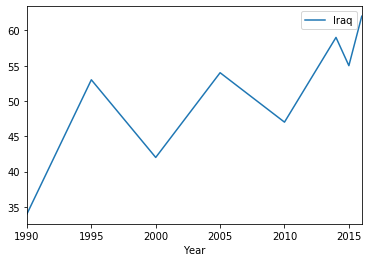

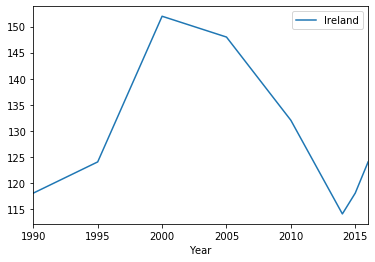

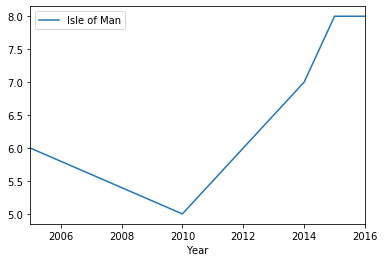

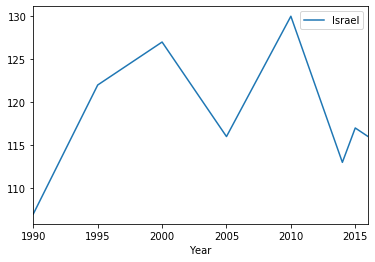

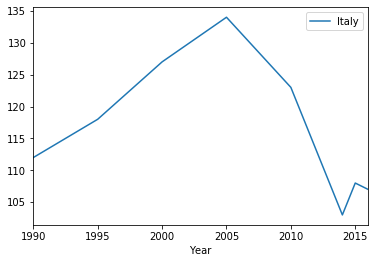

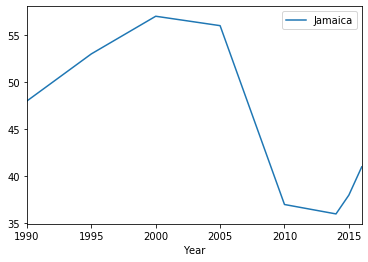

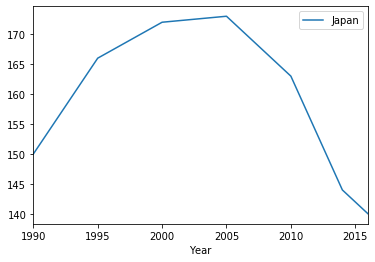

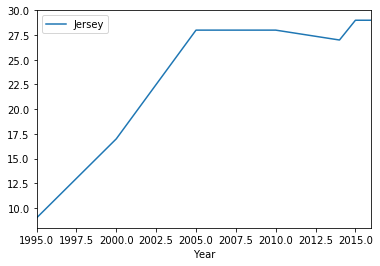

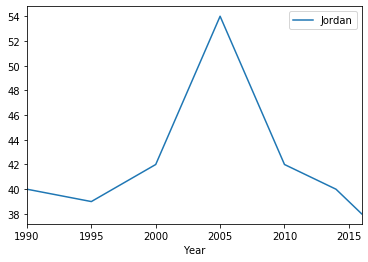

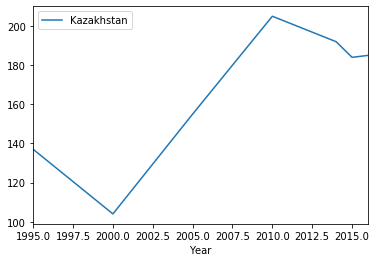

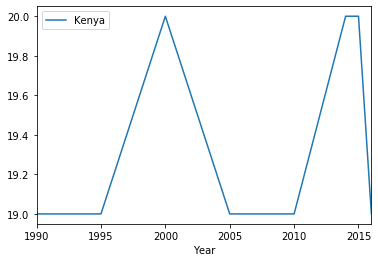

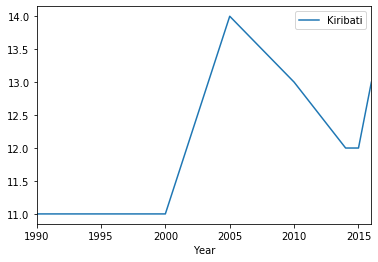

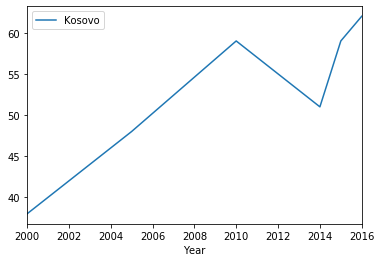

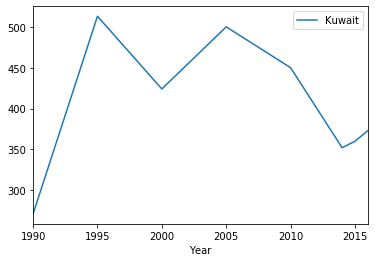

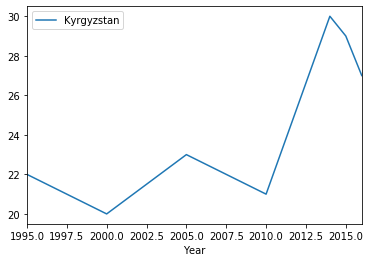

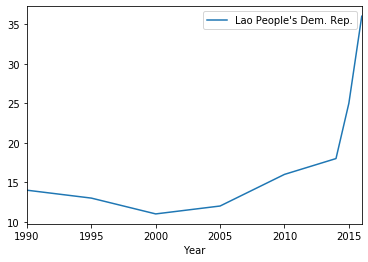

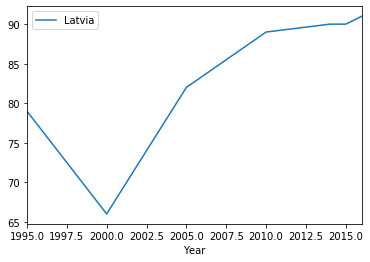

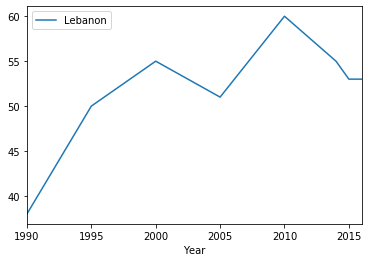

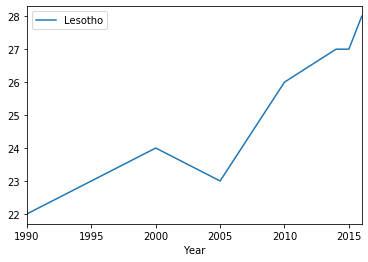

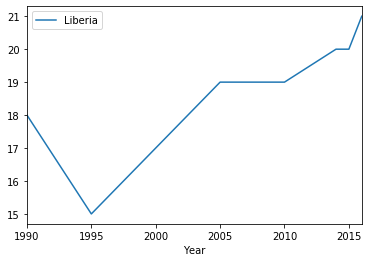

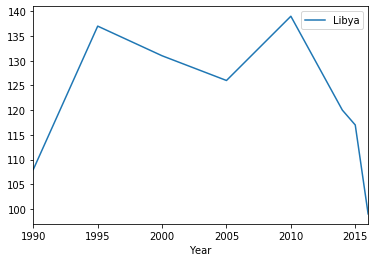

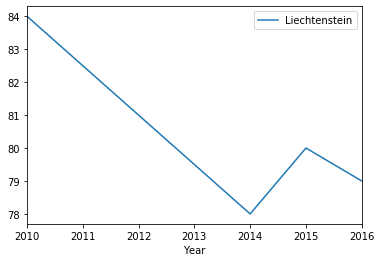

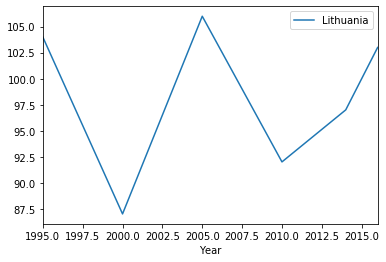

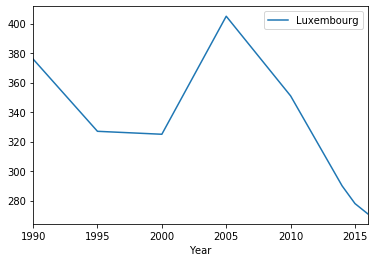

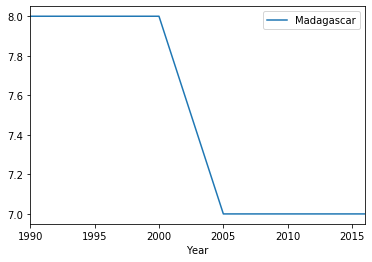

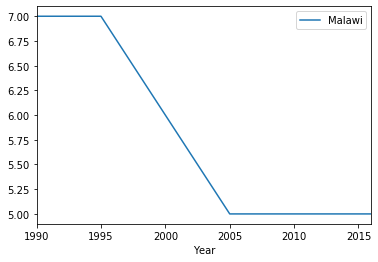

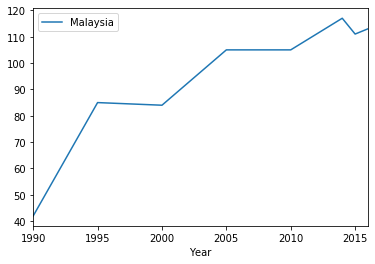

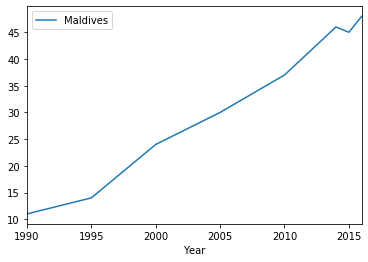

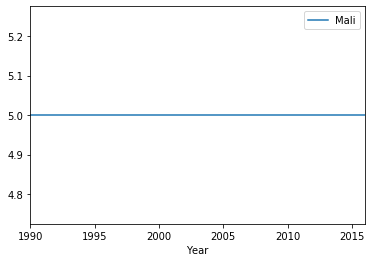

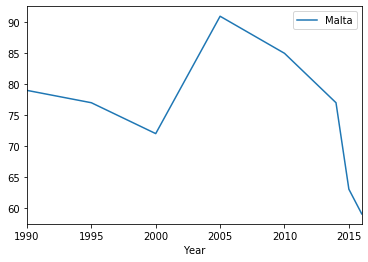

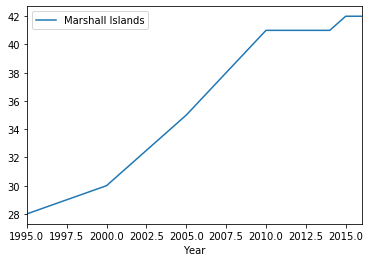

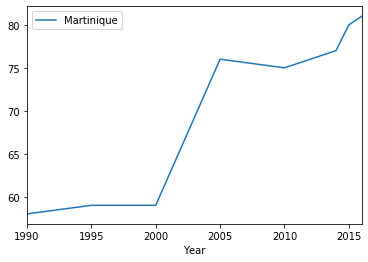

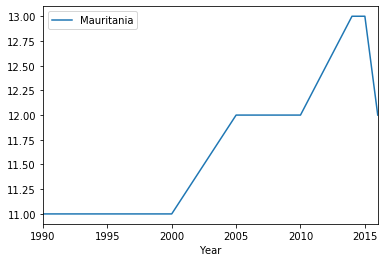

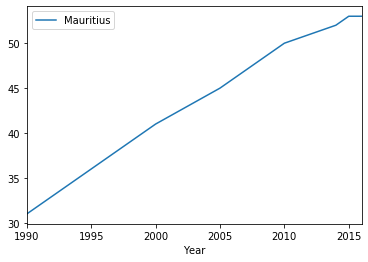

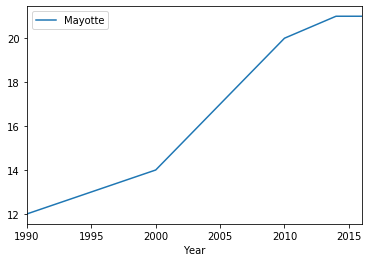

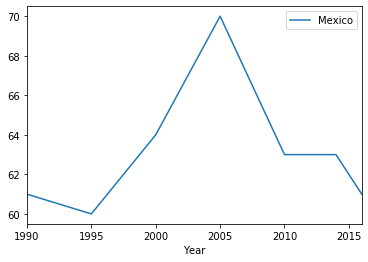

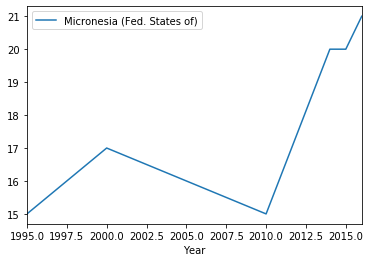

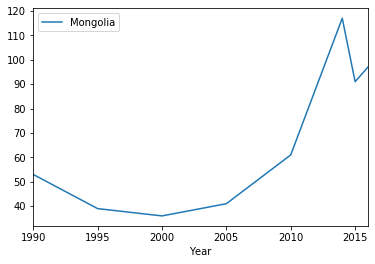

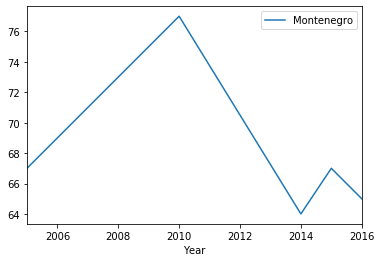

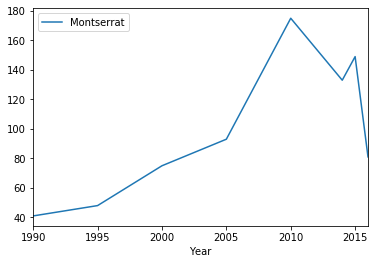

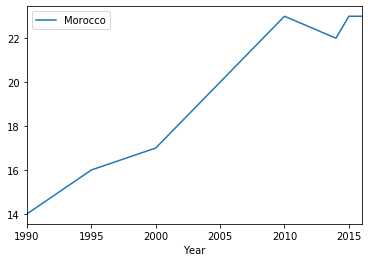

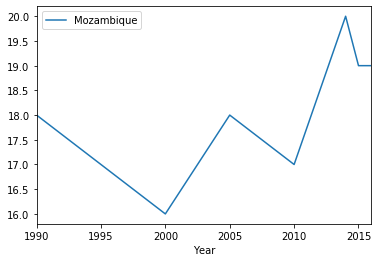

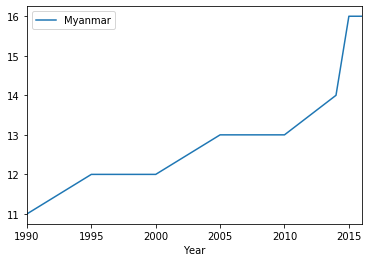

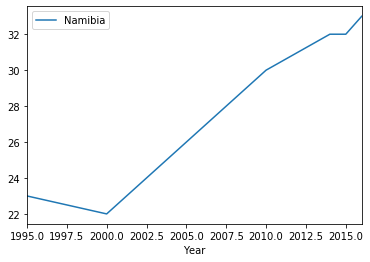

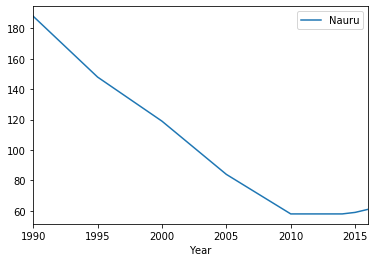

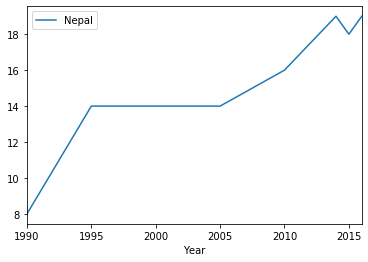

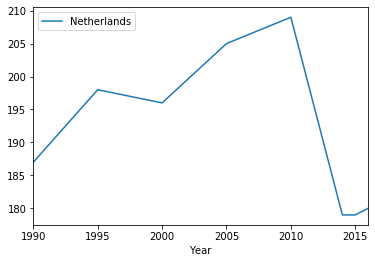

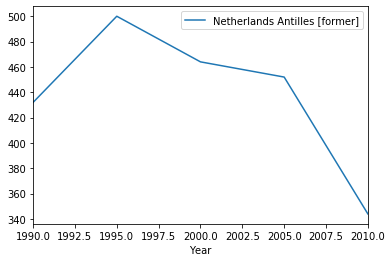

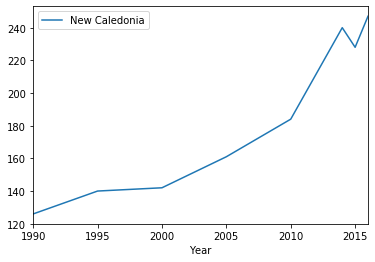

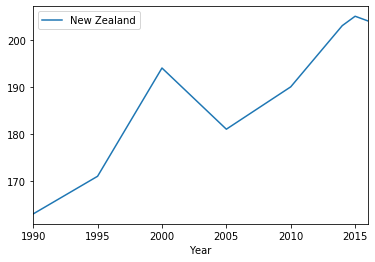

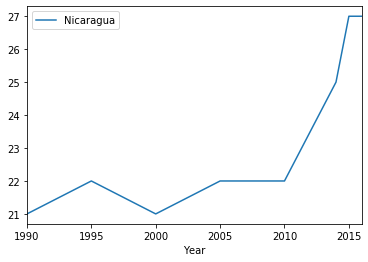

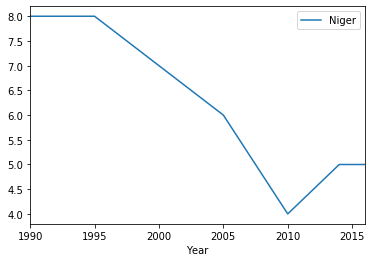

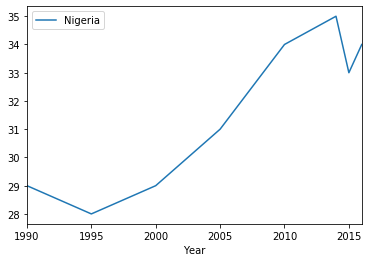

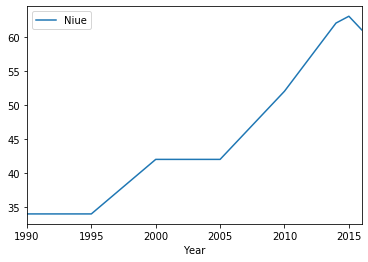

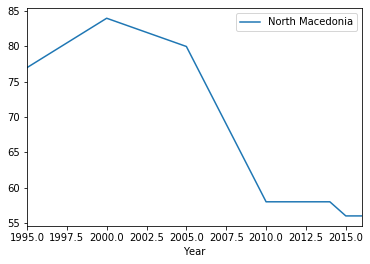

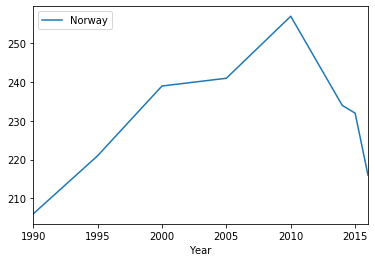

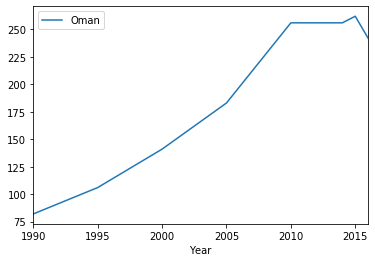

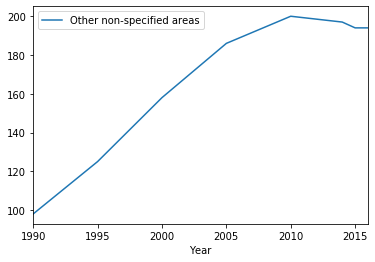

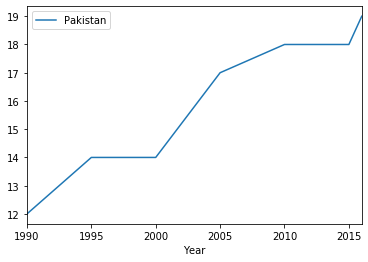

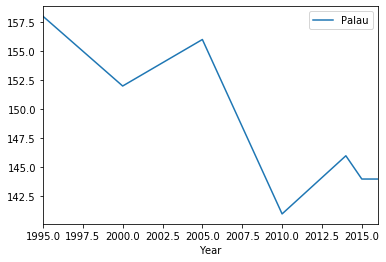

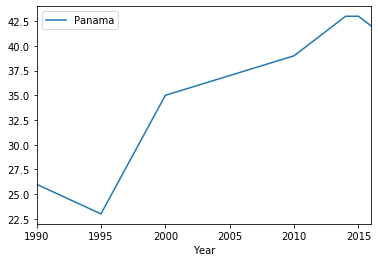

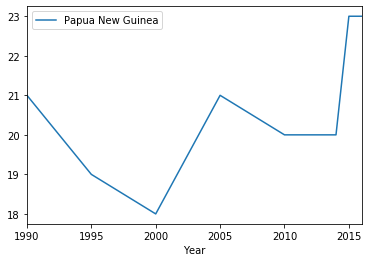

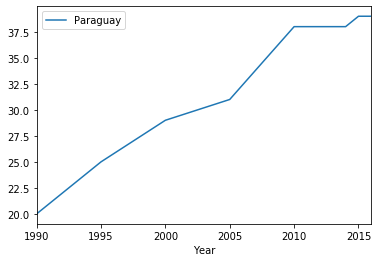

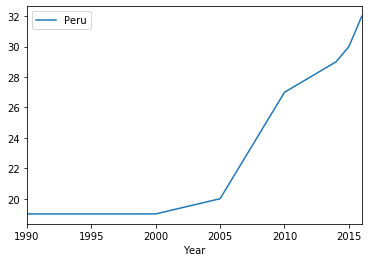

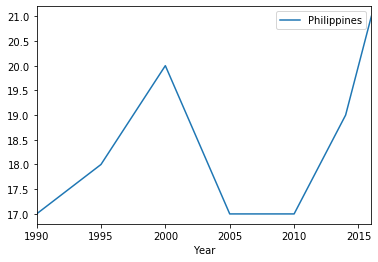

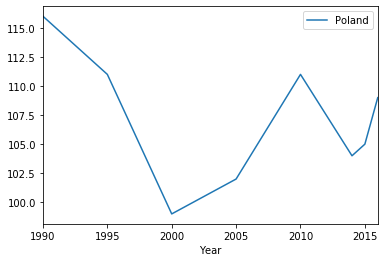

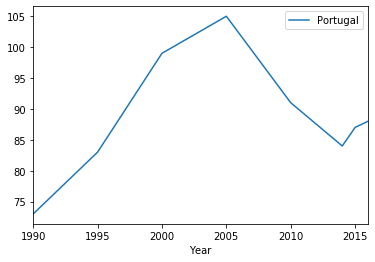

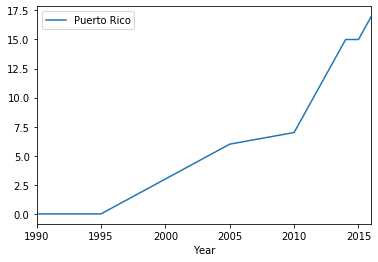

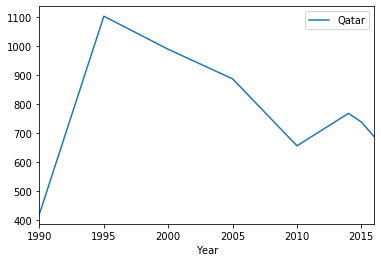

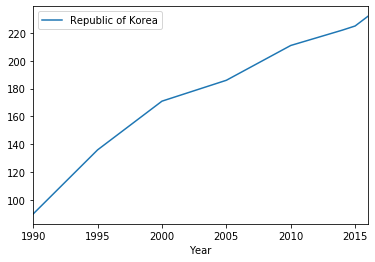

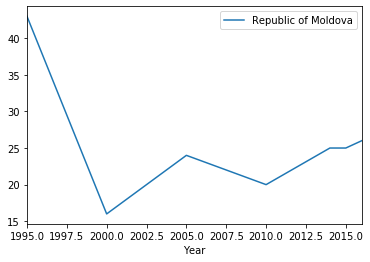

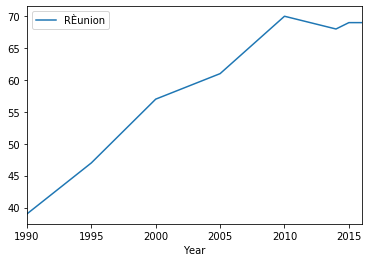

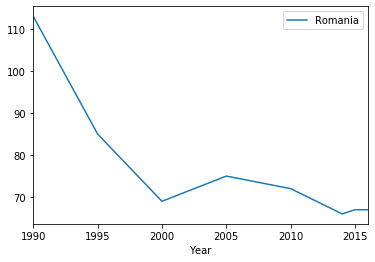

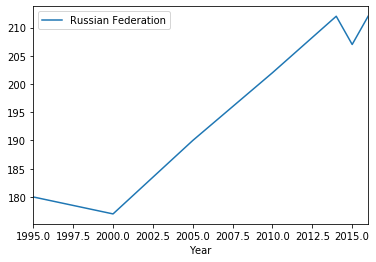

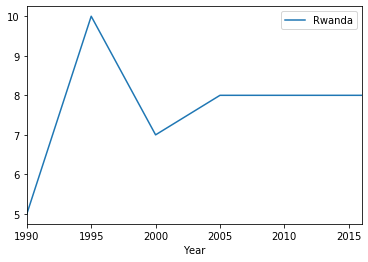

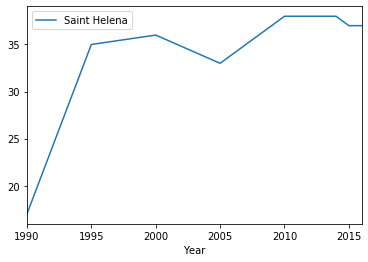

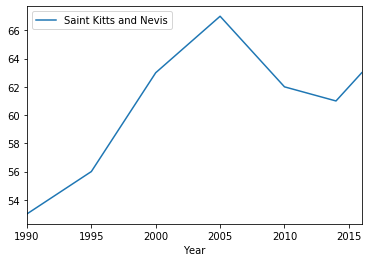

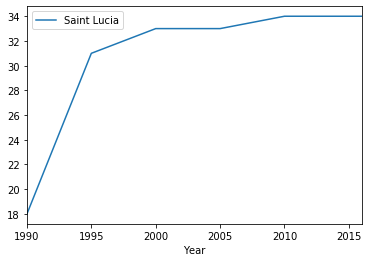

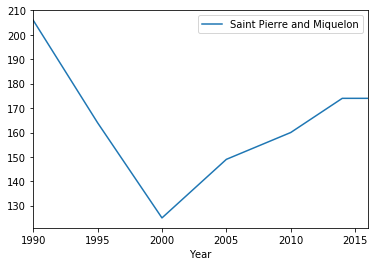

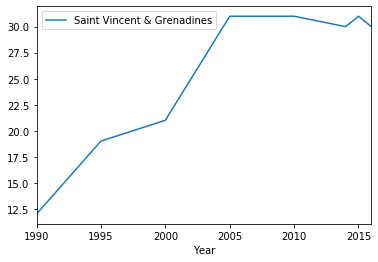

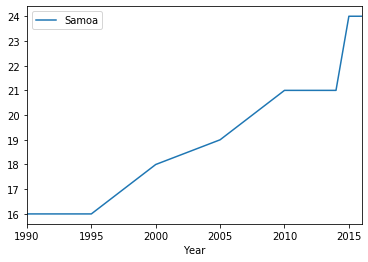

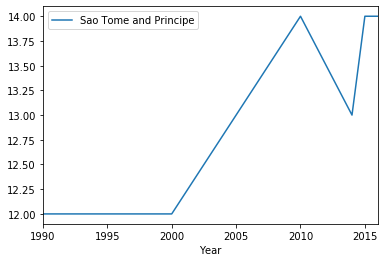

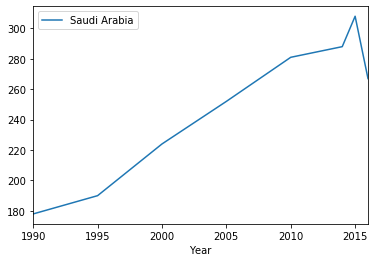

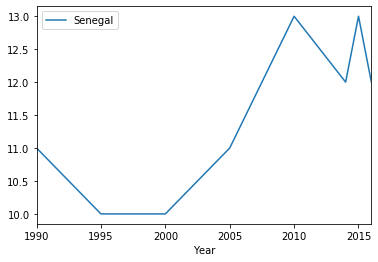

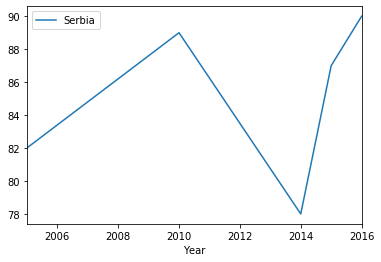

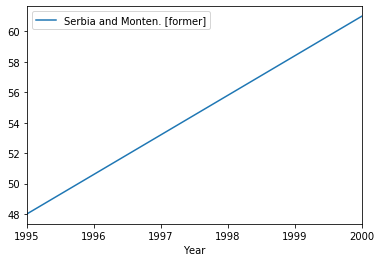

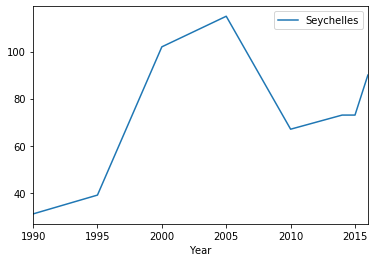

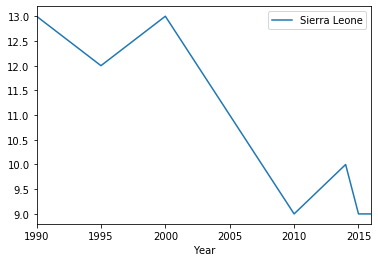

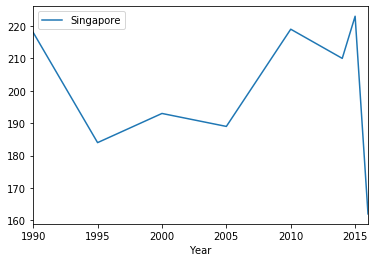

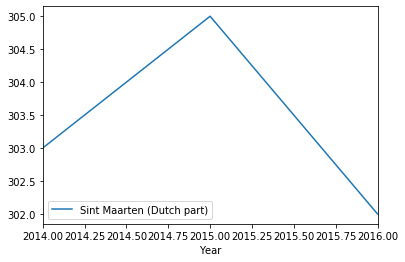

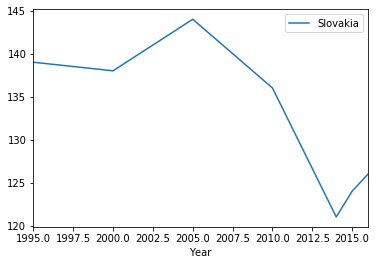

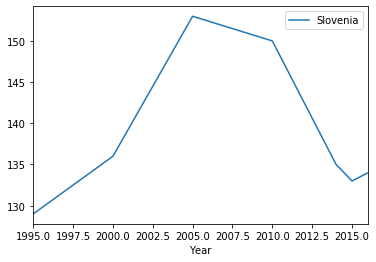

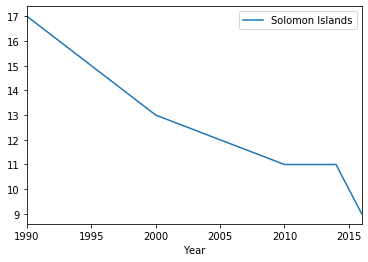

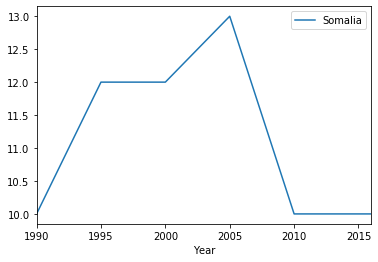

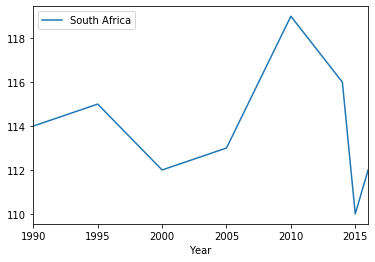

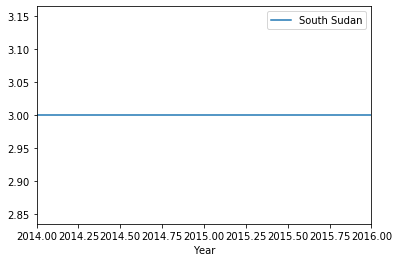

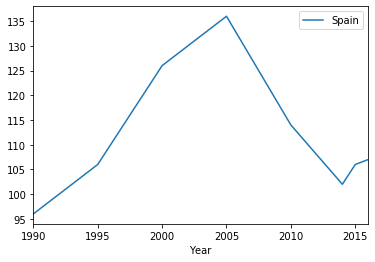

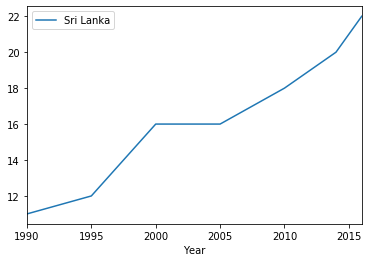

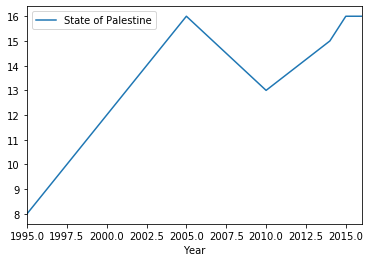

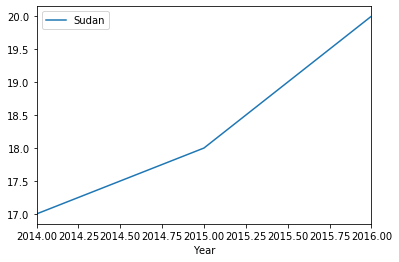

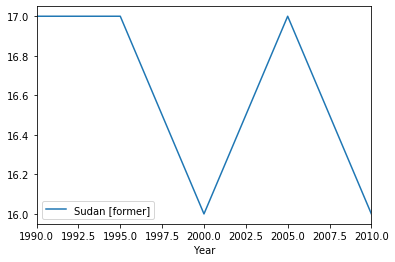

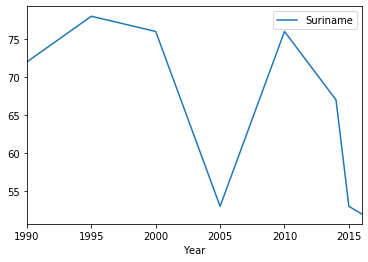

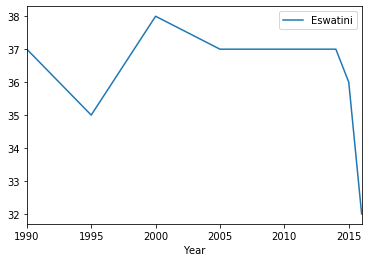

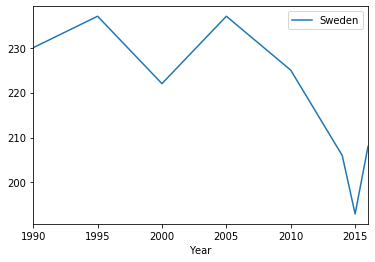

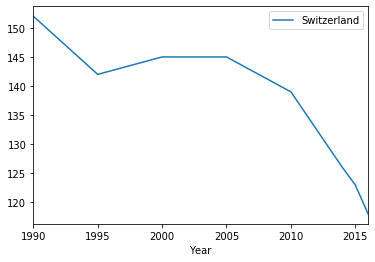

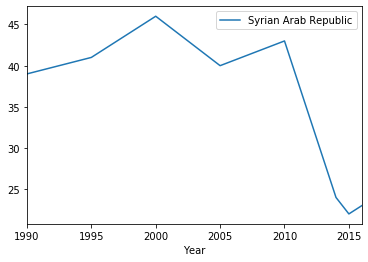

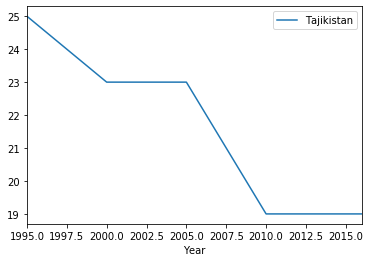

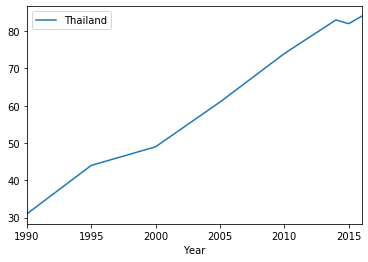

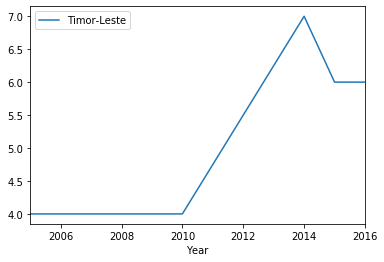

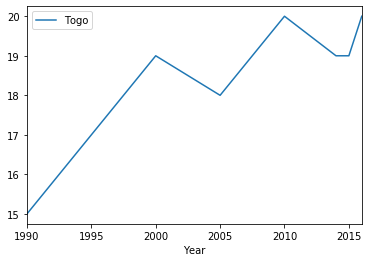

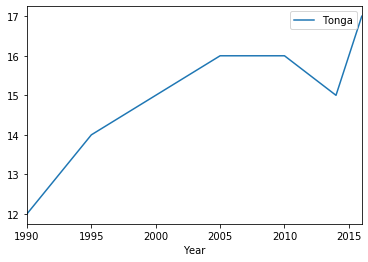

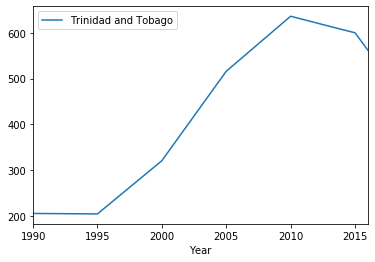

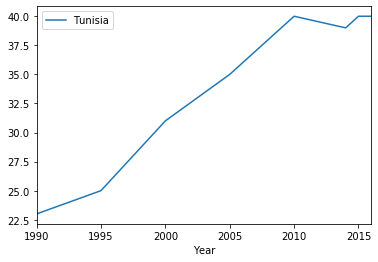

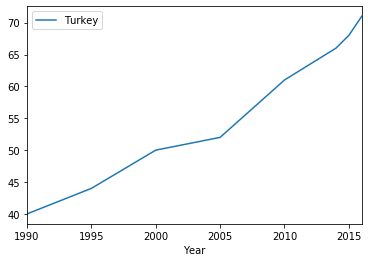

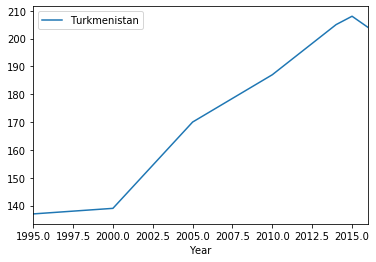

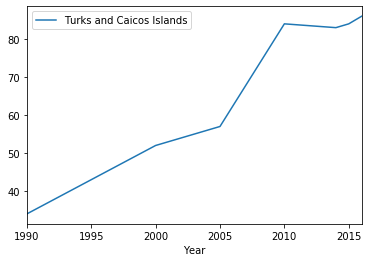

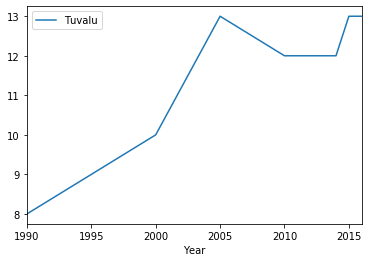

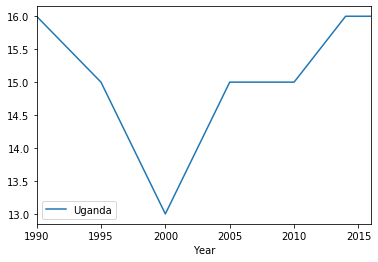

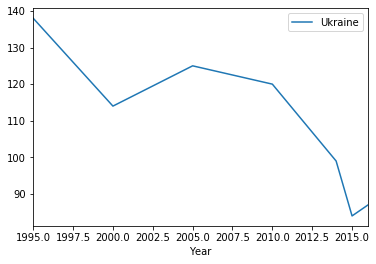

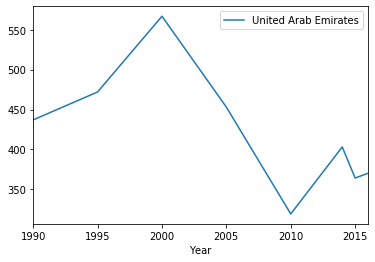

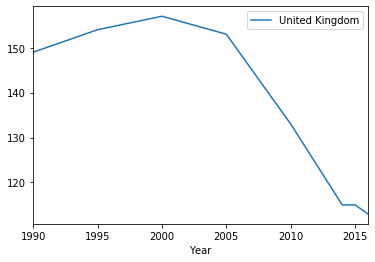

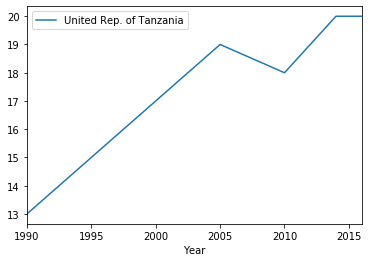

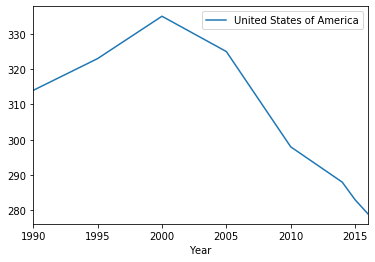

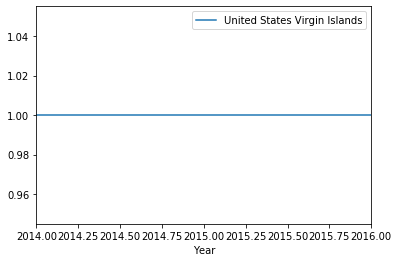

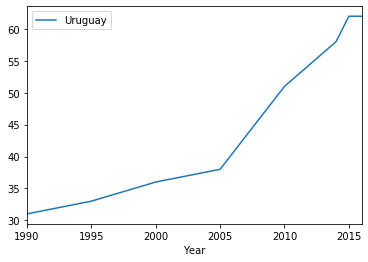

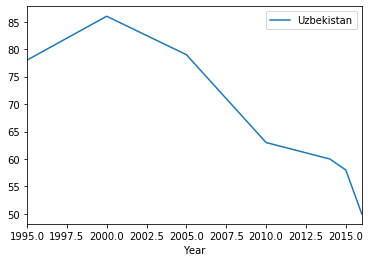

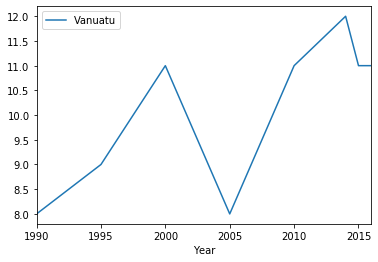

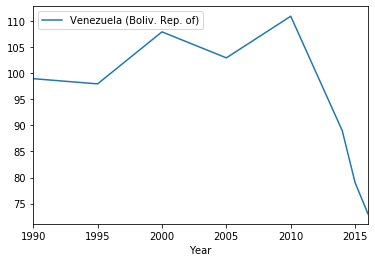

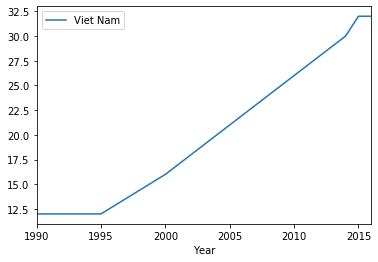

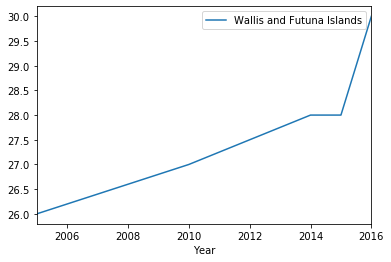

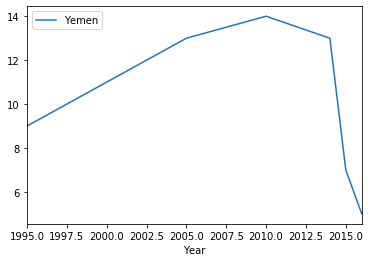

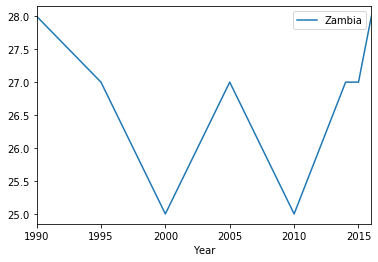

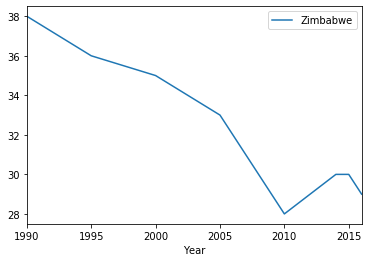

In [12]:
plt.figure()
for area in area_list:
    df_temp = df.loc[(df.Area == area) & (df.Series == 'Supply per capita (gigajoules)')]
    df_temp.plot(x='Year', y='Value', kind='line', label=area)

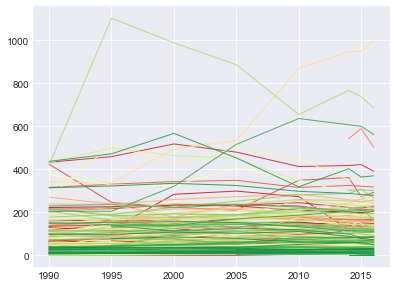

In [24]:
# style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('RdYlGn')
 
# multiple line plot
num=0
for area in area_list:
    df_temp = df.loc[(df.Area == area) & (df.Series == 'Supply per capita (gigajoules)')]
    num = num + 1
    plt.plot(df_temp['Year'], df_temp['Value'], marker='', color=palette(num), linewidth=1, alpha=0.9, label=area)

# plt.legend(loc=2, ncol=2)
plt.rcParams["figure.figsize"] = (30,50)
plt.show()

Hypothesis: Energy usage growth will be driven by developing countries, while energy usage in developed coutries is already high, but growing slowly

Testing this hypotheses based on Human Development Index (HDI) statistics from the UN by taking the top 10 and lowest 10.
http://hdr.undp.org/en/composite/HDI



In [20]:
# creating list containing countries with highest HDI and lowest HDI
lowest_HDI = ['Niger', 'Central African Republic', 'Chad', 'Burundi', 'Sierra Leone', 'Burkina Faso', 'Mali', 'Liberia', 'Mozambique', 'Eritrea']
highest_HDI = ['Norway', 'Switzerland', 'Australia', 'Ireland', 'Germany', 'Iceland', 'China, Hong Kong SAR', 'Sweden', 'Singapore', 'United States of America']

<Figure size 460.8x345.6 with 0 Axes>

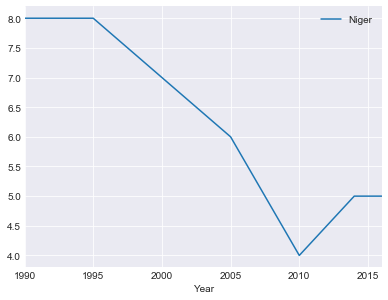

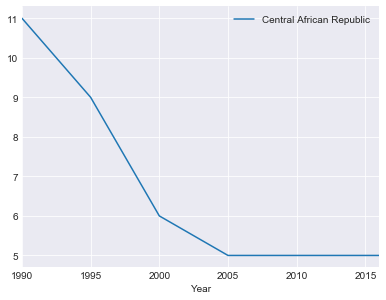

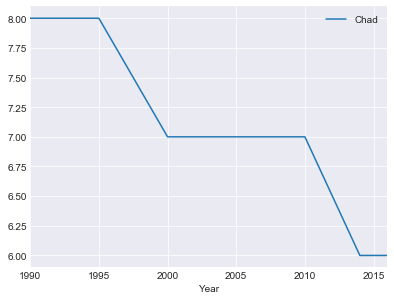

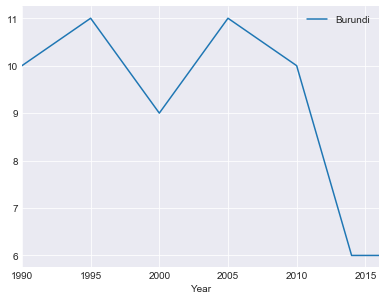

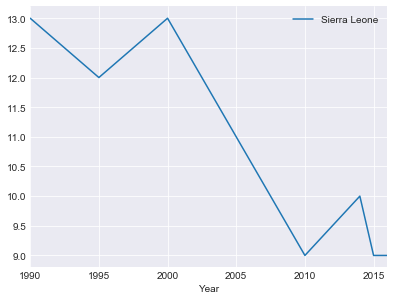

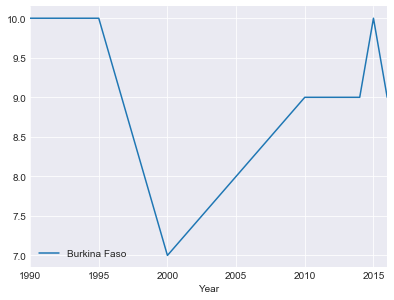

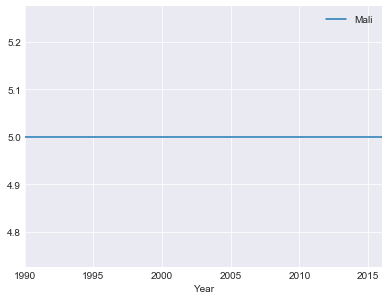

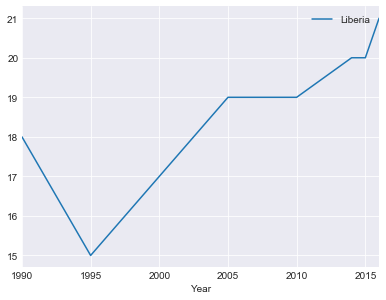

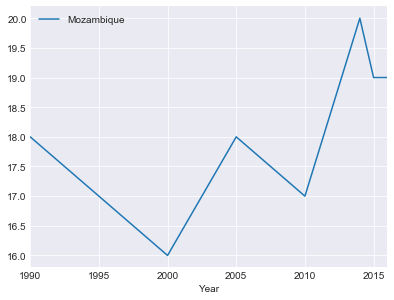

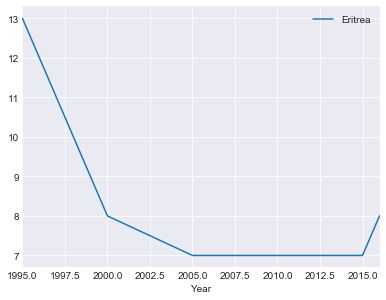

In [47]:
plt.figure()
plt.rcParams["figure.figsize"] = (6.4, 4.8)
for area in lowest_HDI:
    df_temp = df.loc[(df.Area == area) & (df.Series == 'Supply per capita (gigajoules)')]
    df_temp.plot(x='Year', y='Value', kind='line', label=area)

<Figure size 460.8x345.6 with 0 Axes>

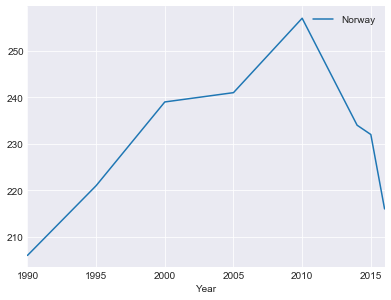

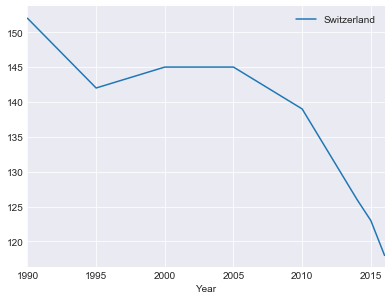

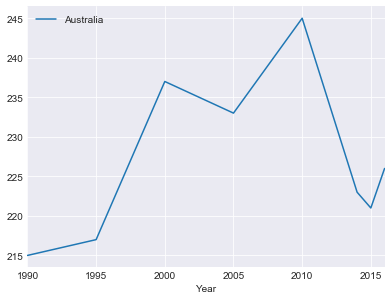

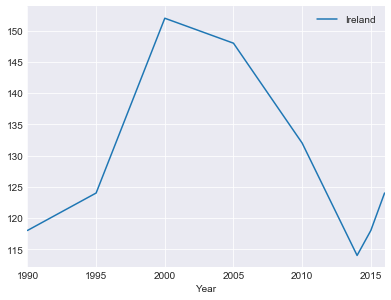

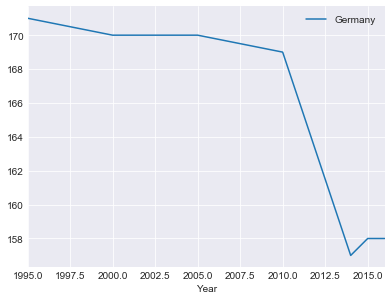

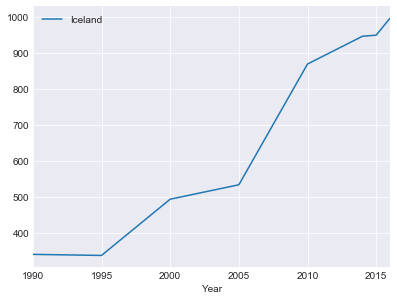

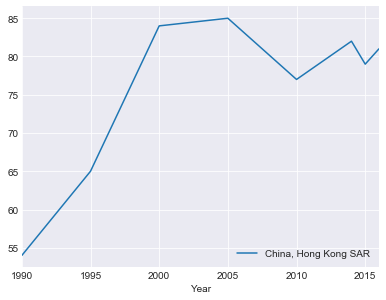

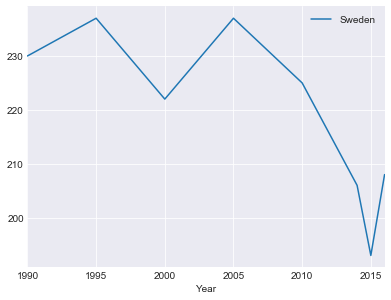

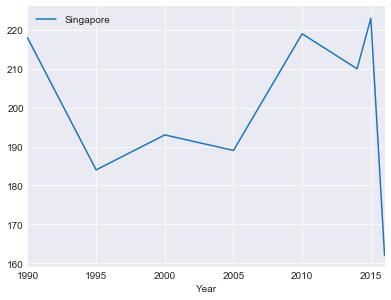

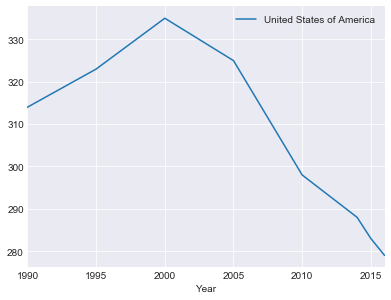

In [48]:
plt.figure()
for area in highest_HDI:
    df_temp = df.loc[(df.Area == area) & (df.Series == 'Supply per capita (gigajoules)')]
    df_temp.plot(x='Year', y='Value', kind='line', label=area)